# Binary image classification

Now, you will have a chance to practice with custom datasets.

Before continuing, get the chrome extension [Fatkun](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf).

Once you add, search google images for two of your favorite fictional characters, and scrape the results using Fatkun. In order to load the images scroll down the page all the way (but do not click "show more"). Then, click Fatkun icon on the toolbar, followed a click on select all and download. 

*Note:* You should have a default download page set up, otherwise the browser will open many windows.

You can also use the datasets provided in the repository containing images of Darth Vader and Batman.

<br>

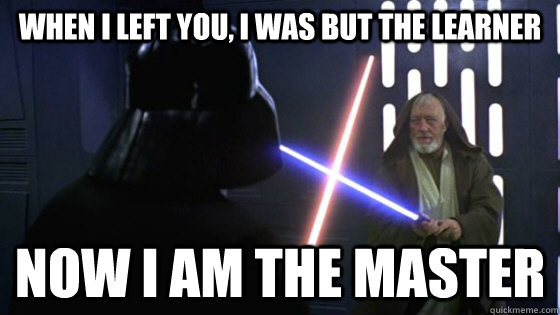

<br>

Unzip the images

In [7]:
import zipfile
import os
import random

parent_folder = "/home/joao/Projects/convnets/data/" # replace by the path containing the zip files

zip0 = "batman.zip" # replace by he name of one zip file
zip_ref0 = zipfile.ZipFile(os.path.join(parent_folder, zip0), 'r')
fictional0 = "batman" # replace by he name of one character
zip_ref0.extractall(os.path.join(parent_folder))
zip_ref0.close()

In [8]:
zip1 = "vader.zip" # replace by he name of one zip file
zip_ref1 = zipfile.ZipFile(os.path.join(parent_folder, zip1), 'r')
fictional1 = "vader" # replace by he name of one character
zip_ref1.extractall(os.path.join(parent_folder))
zip_ref1.close()

In [9]:
print("Folder 0 has {} images".format(len(os.listdir(os.path.join(parent_folder, fictional0)))))
print("Folder 1 has {} images".format(len(os.listdir(os.path.join(parent_folder, fictional1)))))

Folder 0 has 369 images
Folder 1 has 359 images


Next, we prepare to load the data

In [10]:
# Create folders for the training and test datasets
train_dir = os.path.join(parent_folder, "train")
test_dir = os.path.join(parent_folder, "test")
os.mkdir(train_dir)
os.mkdir(test_dir)

# Subdirectories with our training images
train_0_dir = os.path.join(train_dir, fictional0)
train_1_dir = os.path.join(train_dir, fictional1)
os.mkdir(train_0_dir)
os.mkdir(train_1_dir)

# Subdirectories with our training images
test_0_dir = os.path.join(test_dir, fictional0)
test_1_dir = os.path.join(test_dir, fictional1)
os.mkdir(test_0_dir)
os.mkdir(test_1_dir)

**Exercise:** Write a function to split the data between train and test datasets.

In [11]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is 'batman', and SPLIT SIZE is .8
# Then 80% of the images in 'batman' will be copied to the TRAINING dir
# and 20% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

import math
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    
# YOUR CODE ENDS HERE

# Confirm if these variables are correct
SOURCE_DIR_0 = os.path.join(parent_folder, fictional0)
TRAINING_DIR_0 = train_0_dir
TESTING_DIR_0 = test_0_dir
SOURCE_DIR_1 = os.path.join(parent_folder, fictional1)
TRAINING_DIR_1 = train_1_dir
TESTING_DIR_1 = test_1_dir

split_size = .8
split_data(SOURCE_DIR_0, TRAINING_DIR_0, TESTING_DIR_0, split_size)
split_data(SOURCE_DIR_1, TRAINING_DIR_1, TESTING_DIR_1, split_size)

In [12]:
print(len(os.listdir(train_0_dir)))
print(len(os.listdir(train_1_dir)))
print(len(os.listdir(test_0_dir)))
print(len(os.listdir(test_1_dir)))

295
287
74
72


Preprocess the images in order to be able to feed to a classification model

In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=2,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = test_dir
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=2,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 569 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


Build the model that is going to classify the images

In [14]:
# DEFINE A KERAS MODEL TO PERFORM BINARY IMAGE CLASSIFICATION
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HER
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # YOUR CODE HERE
    
    # YOUR CODE HERE
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class and 1 for the other
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

W0928 13:35:03.339431 140158218405696 deprecation.py:506] From /home/joao/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0928 13:35:03.508901 140158218405696 deprecation.py:323] From /home/joao/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
284/285 [============================>.] - ETA: 0s - loss: 0.7443 - acc: 0.5891

/home/joao/anaconda3/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


285/285 [==============================] - 21s 73ms/step - loss: 0.7440 - acc: 0.5905 - val_loss: 0.6515 - val_acc: 0.6164
Epoch 2/5
285/285 [==============================] - 21s 72ms/step - loss: 0.6031 - acc: 0.7188 - val_loss: 0.5591 - val_acc: 0.7260
Epoch 3/5
285/285 [==============================] - 20s 71ms/step - loss: 0.5088 - acc: 0.7786 - val_loss: 0.5751 - val_acc: 0.6781
Epoch 4/5
285/285 [==============================] - 20s 70ms/step - loss: 0.3958 - acc: 0.8471 - val_loss: 0.8355 - val_acc: 0.7192
Epoch 5/5
285/285 [==============================] - 20s 71ms/step - loss: 0.2938 - acc: 0.9086 - val_loss: 0.7948 - val_acc: 0.6781


145/145 [==============================] - 2s 14ms/step - loss: 0.6826 - acc: 0.7793


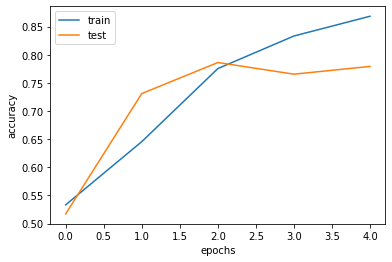

In [54]:
import matplotlib.pyplot as plt

model.evaluate(validation_generator)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()